# Data cleaning for consistency



## Connect to DB

In [1]:
import os
import psycopg2

conn = psycopg2.connect(host='localhost', port=5432, dbname="ANTT", user=os.environ["PGDBUSER"], password=os.environ["PGDBPASSWORD"])
cur = conn.cursor()

## Verify available plates

In [2]:
query = """
    SELECT
        cnpj, plate, COUNT(1) as c
    FROM 
        regulartrips
    GROUP BY
        cnpj, plate
    ORDER BY
        c DESC
"""

cur.execute(query)
result = cur.fetchall()

In [3]:
result

[('27488725000127', 'OYE8074', 13754),
 ('55958318000171', 'AAA9999', 6692),
 ('27488725000127', 'OYE8073', 6191),
 ('12191409000111', 'RGS6G87', 4916),
 ('86431749000109', 'QJV2726', 4726),
 ('86431749000109', 'QJV2636', 4451),
 ('27486182000109', 'QRD6395', 4333),
 ('12191409000111', 'RGS6G77', 4229),
 ('27486182000109', 'MTU4023', 4208),
 ('04816447000194', 'NOP1H95', 4176),
 ('23542573000142', 'QXA1954', 4110),
 ('23542573000142', 'QXB7823', 4032),
 ('23542573000142', 'QXA1980', 3989),
 ('23542573000142', 'QXA1972', 3921),
 ('23542573000142', 'QXB7759', 3902),
 ('23542573000142', 'QXB7883', 3868),
 ('32404063000108', 'KVV4808', 3797),
 ('23542573000142', 'QXB7780', 3765),
 ('17063703000161', 'ECM8997', 3676),
 ('23542573000142', 'RTF1A40', 3659),
 ('23542573000142', 'RTE4B25', 3597),
 ('23542573000142', 'QOI1401', 3561),
 ('23542573000142', 'QOI1411', 3468),
 ('32404063000108', 'LSV3667', 3451),
 ('12191409000111', 'SAF6I24', 3402),
 ('55340921000195', 'ENI5530', 3363),
 ('23542573

## Finding and counting how many companies registered the default vehicle plate

In [4]:
count = 0

for entry in result:
    if entry[1].upper() == 'AAA9999':
        count += 1
        print(entry[0])

print(count)

55958318000171
1


In [5]:
count = 0

for entry in result:
    if entry[0] == '55958318000171':
        count +=1
        print(entry[1])

print(count)

AAA9999
EFO0437
DPF2945
EQU2836
EQU2840
EQU2838
EFO0441
EFO0433
EQU2837
EFO0434
EQU2839
EFO0435
EFO0438
EFO0436
EQU2835
EFO0439
EFO0440
EFO0442
EQU2841
EQU2843
EQU2842
EQU2844
EQU2851
EQU2848
EQU2I34
EQU2849
26


### Only the following company has plate entries as 'AAA9999', which is the default value

In [6]:
query = "SELECT name, cnpj FROM companyinfo WHERE cnpj = '55958318000171'"
cur.execute(query)
company = cur.fetchone()
company

("Rapido D'oeste LTDA", '55958318000171')

In [7]:
query = """
    SELECT
        plate, COUNT(1) as c
    FROM
        regulartrips
    WHERE
        cnpj = '55958318000171'
    GROUP BY
        plate
    ORDER BY
        c DESC
"""

cur.execute(query)
result = cur.fetchall()
result

[('AAA9999', 6692),
 ('EFO0437', 1495),
 ('DPF2945', 1102),
 ('EQU2836', 940),
 ('EQU2840', 799),
 ('EQU2838', 610),
 ('EFO0441', 388),
 ('EFO0433', 315),
 ('EQU2837', 290),
 ('EFO0434', 226),
 ('EQU2839', 224),
 ('EFO0435', 219),
 ('EFO0438', 209),
 ('EFO0436', 202),
 ('EQU2835', 172),
 ('EFO0439', 157),
 ('EFO0440', 156),
 ('EFO0442', 101),
 ('EQU2841', 85),
 ('EQU2843', 57),
 ('EQU2842', 49),
 ('EQU2844', 11),
 ('EQU2848', 7),
 ('EQU2851', 7),
 ('EQU2I34', 3),
 ('EQU2849', 2)]

## Trips with no vehicle plate specified

In [8]:
query = """
    SELECT 
        line, expectedtripdate, COUNT(1) as c
    FROM 
        regulartrips
    WHERE
        plate = 'AAA9999'
    GROUP BY
        line, expectedtripdate
    ORDER BY
        c DESC
"""

cur.execute(query)
result = cur.fetchall()
result

[('08024100', datetime.date(2023, 1, 24), 10),
 ('08024100', datetime.date(2023, 1, 28), 10),
 ('08024100', datetime.date(2023, 1, 25), 10),
 ('08024100', datetime.date(2023, 1, 11), 9),
 ('08024100', datetime.date(2023, 1, 27), 9),
 ('06092000', datetime.date(2023, 9, 29), 8),
 ('06092000', datetime.date(2023, 2, 1), 8),
 ('06092000', datetime.date(2023, 5, 26), 8),
 ('06092000', datetime.date(2023, 3, 15), 8),
 ('06092000', datetime.date(2023, 5, 25), 8),
 ('06092000', datetime.date(2023, 10, 26), 8),
 ('06092000', datetime.date(2023, 8, 25), 8),
 ('06092000', datetime.date(2023, 10, 19), 8),
 ('08024100', datetime.date(2023, 1, 4), 8),
 ('06092000', datetime.date(2023, 5, 17), 8),
 ('08024100', datetime.date(2023, 1, 6), 8),
 ('08024100', datetime.date(2023, 1, 3), 8),
 ('06092000', datetime.date(2023, 10, 25), 8),
 ('06092000', datetime.date(2023, 10, 20), 8),
 ('08024100', datetime.date(2023, 1, 20), 8),
 ('08024100', datetime.date(2023, 1, 13), 8),
 ('08024100', datetime.date(202

## Finding Ghost Trips

Ghost trips are defined as trips that are impossible to have happened. The dataset has lots of trips that were supposedly done with the same bus at the same time. It was decided that only the last entry would be kept in the database, even if it does not represent trip that actually occured.

In [23]:
query = """
    SELECT
        cnpj, plate, tripstartdatetime, COUNT(1) as c
    FROM 
        regulartrips
    GROUP BY
        tripstartdatetime, cnpj, plate
    HAVING
        COUNT(1) > 1
    ORDER BY
        c DESC;        
"""

cur.execute(query)
result = cur.fetchall()

Taking the first row as an example, the bus with plate "SHN3I44" started **15** trips at 19:00:58, 2024/11/03

In [24]:
result

[('23542573000142', 'SHN3I44', datetime.datetime(2024, 11, 3, 19, 0, 58), 15),
 ('76299270000107', 'AZZ8136', datetime.datetime(2023, 1, 14, 12, 22, 22), 10),
 ('92667948000113', 'IWZ3054', datetime.datetime(2023, 1, 19, 6, 51, 26), 9),
 ('76299270000107', 'BDR6E38', datetime.datetime(2023, 1, 13, 17, 50), 9),
 ('25634551000138', 'PAX3A25', datetime.datetime(2024, 3, 23, 15, 34, 57), 9),
 ('23562535000151', 'PKA8C20', datetime.datetime(2024, 4, 6, 11, 1, 4), 9),
 ('25634551000138', 'LTP7C79', datetime.datetime(2024, 11, 9, 11, 48, 59), 9),
 ('55340921000195', 'CND6110', datetime.datetime(2023, 11, 5, 8, 21, 31), 9),
 ('23562535000151', 'PBK9506', datetime.datetime(2023, 12, 10, 17, 49, 57), 9),
 ('25634569000130', 'PKK9799', datetime.datetime(2024, 2, 3, 13, 21), 9),
 ('25634551000138', 'PKK4823', datetime.datetime(2024, 2, 3, 21, 42, 58), 9),
 ('25634551000138', 'PKK8897', datetime.datetime(2022, 2, 20, 3, 24, 15), 9),
 ('25634551000138', 'PKQ6290', datetime.datetime(2022, 5, 22, 11, 

## Counting ghost trips per company

In [25]:
query = """
    WITH
    	GHOSTS AS (
    		SELECT
    			CNPJ, PLATE, TRIPSTARTDATETIME, COUNT(1) AS C
    		FROM
    			REGULARTRIPS
    		GROUP BY
    			TRIPSTARTDATETIME, CNPJ, PLATE
    		HAVING
    			COUNT(1) > 1
    	),
    	COMPANIES AS (
    		SELECT
    			CNPJ, SUM(C) AS S
    		FROM
    			GHOSTS
    		GROUP BY
    			CNPJ
    	)
    SELECT
    	INFO.NAME, COMPANIES.CNPJ, COMPANIES.S
    FROM
    	COMPANIES
    	INNER JOIN COMPANYINFO AS INFO ON COMPANIES.CNPJ = INFO.CNPJ
    ORDER BY
    	COMPANIES.S DESC
"""

cur.execute(query)
result = cur.fetchall()

In [31]:
result

[('Auto Viacao Catarinense LTDA', '82647884000135', Decimal('306953')),
 ('Consorcio Guanabara de Transportes', '23542573000142', Decimal('268598')),
 ('Viacao Cometa S A', '61084018000103', Decimal('226784')),
 ('Auto Viacao 1001 LTDA', '30069314000101', Decimal('164066')),
 ('Viacao Garcia LTDA', '78586674000107', Decimal('163324')),
 ('Viacao Aguia Branca S A', '27486182000109', Decimal('147944')),
 ('Expresso Guanabara LTDA', '41550112000101', Decimal('147373')),
 ('Guanabara Real Expresso Limitada', '25634551000138', Decimal('125947')),
 ('Brasil Sul Santo Anjo Linhas Rodoviarias LTDA',
  '05233521000102',
  Decimal('93639')),
 ('Consorcio Federal de Transportes', '23562535000151', Decimal('76435')),
 ('Viacao Motta Limitada', '55340921000195', Decimal('76261')),
 ('Eucatur Solimoes Transportes de Passageiros e Cargas Ltda.',
  '07549414000113',
  Decimal('73629')),
 ('Expresso do Sul S/A', '04080646000187', Decimal('64789')),
 ('Empresa Auto Viacao Progresso LTDA', '1078867700019

In [39]:
import pandas as pd

resultDF = pd.DataFrame(result, columns=["Company Name", "CNPJ", "Ghost Trips"])
resultDF["Ghost Trips"] = resultDF["Ghost Trips"].astype('int')
resultDF.describe()

,Ghost Trips
count,180.000000
mean,14753.222222
std,43520.761833
min,2.000000
25%,26.000000
50%,169.500000
75%,5444.000000
max,306953.000000


## Top 10 companies with the most ghost trips

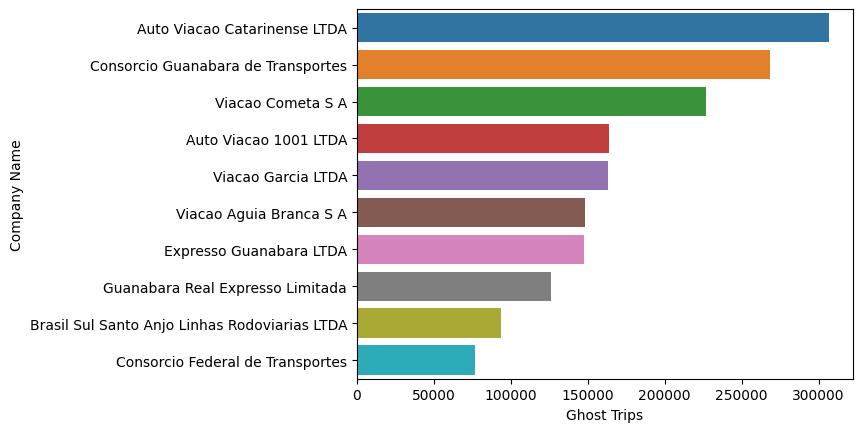

In [41]:
import seaborn as sns

barplot = sns.barplot(data=resultDF.iloc[:10,:], x="Ghost Trips", y="Company Name", hue="Company Name")

### Comparing the amount of registered trips to the amount of ghost trips

In [56]:
top10 = resultDF.loc[:10, ["CNPJ"]]
cnpjs = []

for entry in top10.values:
    cnpjs.append(entry[0])

query = """
    SELECT
        CNPJ, COUNT(1) AS C
    FROM
        REGULARTRIPS
    WHERE 
        CNPJ IN ({cnpjs})
    GROUP BY
        CNPJ        
"""
query

"\n    SELECT\n        CNPJ, COUNT(1) AS C\n    FROM\n        REGULARTRIPS\n    WHERE \n        CNPJ IN (['82647884000135', '23542573000142', '61084018000103', '30069314000101', '78586674000107', '27486182000109', '41550112000101', '25634551000138', '05233521000102', '23562535000151', '55340921000195'])\n    GROUP BY\n        CNPJ        \n"

## Removing ghost trips from the database

In [ ]:
query = """
    WITH
    	GHOSTS AS (
    		SELECT
    			T.CNPJ,
    			T.PLATE,
    			T.TRIPSTARTDATETIME,
    			MAX(T.ID) AS MAXID
    		FROM
    			REGULARTRIPS AS T
    		GROUP BY
    			T.CNPJ,
    			T.PLATE,
    			T.TRIPSTARTDATETIME
    		HAVING
    			COUNT(1) > 1
    	)
    SELECT FROM
        REGULARTRIPS AS T
        INNER JOIN GHOSTS ON GHOSTS.CNPJ = T.CNPJ
    	AND GHOSTS.PLATE = T.PLATE
    	AND GHOSTS.TRIPSTARTDATETIME = T.TRIPSTARTDATETIME
    WHERE
        T.ID < GHOSTS.MAXID

"""